# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [23]:
%matplotlib inline
from itertools import tee

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/james/miniconda3/envs/pydata/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


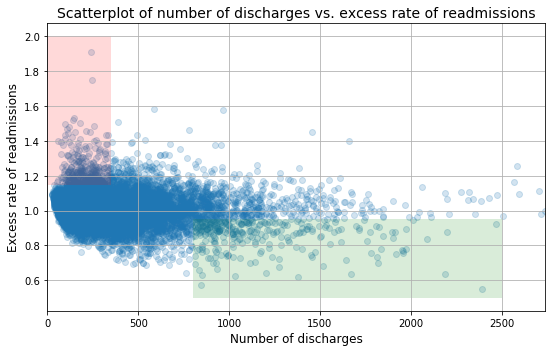

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()
plt.show()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn
hos = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']][81:-3]
hos = hos.rename(columns = {'Number of Discharges':'discharge', 'Excess Readmission Ratio':'readmission'})

### A. Initial observations from the plot
- Overall, rate of readmissions is trending down with increasing number of discharges
     - Visually, it does appear that the rate of readmissions is lower for larger hospitals.  However, with this many data points, it is difficult to tell what is going on where the points are clustered very densely, so I would not trust this visual analysis by itself without some statistics to back it up.
- With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
    - There does appear to be a cluster of points with particularly high readmittance and low discharges.  Again, it is difficult to tell if these points represent a significant fraction of the hospitals with a low number of discarges.
- With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)
    - There appear to be more low readmittance hospitals for large number of discharges.  However, it looks like this trend may go away for very large hospitals (with > 2500 discharges), but there aren't many data points in that region.

### B. Statistics
- In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
- In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [6]:
small_hospitals = hos[hos.discharge < 100]
print(len(small_hospitals))

1188


With this large a sample size, z- and t- tests are approximately equivalent, so I will perform hpothesis testing with ```scipy.stats.ttest_1samp```.  I will perform the test for the following hypotheses at $\alpha = 0.01$ significance:

$H_0: \mu_{readmission} = 1.023$

$H_a: \mu_{readmission} \ne 1.023$

In [7]:
print(stats.ttest_1samp(small_hospitals.readmission, 1.023))

Ttest_1sampResult(statistic=-0.22688487593546766, pvalue=0.8205523295666344)


So I fail to reject the null hypothesis at this significance level.

Next, I perform another test at the same significance with the following hypotheses:

$H_0: p_{readmission > 1} = 0.63$

$H_a: p_{readmission > 1} \ne 0.63$

In [8]:
proportion_sample = small_hospitals.readmission > 1
print(stats.ttest_1samp(proportion_sample, 0.63))

Ttest_1sampResult(statistic=0.15395884267671817, pvalue=0.8776683580239967)


And again, I fail to reject the null hyothesis.  I then repeat this exact same procedure for the large hospitals.

- In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [9]:
large_hospitals = hos[hos.discharge > 1000]
print(len(large_hospitals))

460


$H_0: \mu_{readmission} = 0.978$

$H_a: \mu_{readmission} \ne 0.978$

In [10]:
print(stats.ttest_1samp(large_hospitals.readmission, 0.978))

Ttest_1sampResult(statistic=0.1928174217830325, pvalue=0.8471872438143195)


$H_0: p_{readmission > 1} = 0.44$

$H_a: p_{readmission > 1} \ne 0.44$

In [11]:
proportion_sample = large_hospitals.readmission > 1
print(stats.ttest_1samp(proportion_sample, 0.44))

Ttest_1sampResult(statistic=0.24363106854622454, pvalue=0.807625414141681)


And I fail to reject either null hypothesis.  With all this, I agree with the analysis in the original report.

### C. Conclusions
- There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
- Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

Here, I look at the pearson correlation coeffiecient $\rho$ to test the following hypotheses with $\alpha = 0.01$:

$H_0: \rho = 0$

$H_a: \rho \ne 0$

In [12]:
corr = stats.pearsonr(x,y)
print('pearson: ' + str(corr[0]) + '\tp-value: ' + str(corr[1]))

pearson: -0.09309554287590441	p-value: 1.5022756426464526e-23


So I reject the null hypothesis and conclude that there is a correlation between number of discharges and readmission rates.  This suggests that smaller hospitals are less consistently able to prevent complications that lead to readmission.

### D. Regulatory policy recommendations
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

I generally agree with this idea, since there is strong evidence that smaller hospitals are not doing as well at preventing complications.  One question could be: what should the cutoff be?  In this report, they chose 300 discharges to be the point where a hospital is small enough that it should be required to demonstrate upgraded resource allocation, but where does this value come from?  Well, I imagine we would want to target hospitals where we are sure that there is a correlation between discharge and readmission, so I look at the pearson correlation coefficient and p-value that results from removing all the hospitals below a cutoff, and then vary the cutoff to see where the correlation is strongest.

In [44]:
pearson_pvalues = {}
for cutoff in range(0,1000,50):
    large = hos[hos.discharge > cutoff]
    pearson_pvalues[cutoff] = stats.pearsonr(large.discharge, large.readmission)[1]

I then plot these pvalues on a log scale, along with a horizontal line corresponding to a p-value of 0.01.

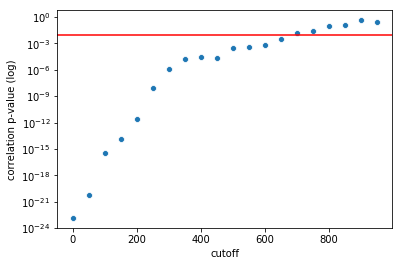

In [45]:
s = pd.Series(pearson_pvalues)
ax = plt.subplot().set_yscale('log')
ax = sns.scatterplot(data=s)
ax.axhline(0.01, color='red')
plt.xlabel('cutoff')
plt.ylabel('correlation p-value (log)')
plt.title('Correlation p-value vs cutoff')
plt.show()

This shows that there is very likely some correlation up to a discharge of about 600.  It is possible that 300 was chosen because there are a manageable number of hospitals below the 300 cutoff, so the cost of enforcing this policy would not be too great.

As for the scatterplot at the top of this notebook, I think that there should be a better way to visualize this, as there are many points that are clustered very densely, and it is difficult to tell what is going on.  For example, it is difficult to tell if the cluster of points in the red area are a significant fraction of the total points that have a similar number of discharges.  To simplify the visualization a little, I will bin the data by discharge, then make barplots and boxplots of the readmission vs. discharge data.

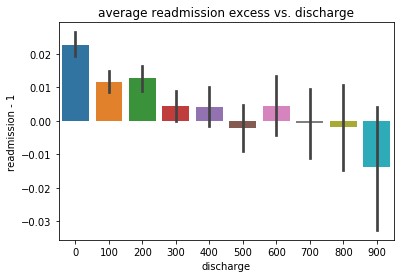

In [81]:
bin_size = 100
bin_num = bin_size * (hos.discharge // bin_size)
hos['bin'] = bin_num
sns.barplot(x='bin', y=hos[hos.discharge < 1000].readmission-1, data=hos[hos.discharge < 1000])
plt.xlabel('discharge')
plt.ylabel('readmission - 1')
plt.title('average readmission excess vs. discharge')
plt.show()

The barplot is nice and simple, and makes the correlation clear, but it only shows average and variance, so I will try a boxplot so that I can more clearly see outliers.

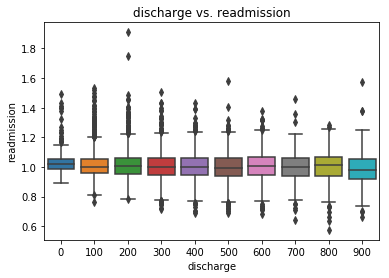

In [84]:
sns.boxplot(x='bin', y='readmission', data=hos[hos.discharge < 1000])
plt.xlabel('discharge')
plt.title('discharge vs. readmission')
plt.show()

The boxplot makes it a bit more difficult to see the correlation, but makes it clear that among the hospitals with low discharge rates, there are many outliers which have very high excess readmission.